A function that grabs google trends data for US, using the pytrends API:

In [1]:
from pytrends.request import TrendReq
import pandas as pd

def search_US_terms(search_terms):
    pytrends = TrendReq(hl='en-US', tz=360)
    df = pd.DataFrame()
    for search_term in search_terms:
        kw_list = [search_term]
        pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
        temp_df = pytrends.interest_over_time()
        df[search_term] = temp_df[search_term]
        
    return df

Some exploration of search terms that are relevant to us:

In [2]:
flu_df = search_US_terms(["Flu Shot", "Flu Shots", "Flu Vaccination", "Flu Vaccine", "Walgreens Flu Shot", "CVS Flu Shot", 
                         "Flu Shot Side Effects", "Flu Shot Near Me", "Flu Shot Clinic", "CDC Flu", "Influenza Vaccine",
                         "What Is The Flu", "Vaccines", "Flu Vaccine Effectiveness", "Kaiser Flu Shot", 
                         "Pregnancy Flu Shot", "Costco Flu Shot"])

In [3]:
flu_df

,Flu Shot,Flu Shots,Flu Vaccination,Flu Vaccine,Walgreens Flu Shot,CVS Flu Shot,Flu Shot Side Effects,Flu Shot Near Me,Flu Shot Clinic,CDC Flu,Influenza Vaccine,What Is The Flu,Vaccines,Flu Vaccine Effectiveness,Kaiser Flu Shot,Pregnancy Flu Shot,Costco Flu Shot
date,,,,,,,,,,,,,,,,,
2013-12-01,13,15,23,21,11,11,17,0,8,10,42,13,23,4,5,23,10
2013-12-08,14,14,24,23,12,10,16,1,6,12,48,16,23,3,5,20,10
2013-12-15,15,14,22,22,14,11,16,0,10,11,36,15,19,5,4,14,7
2013-12-22,15,16,19,26,17,10,16,1,10,16,22,19,15,12,8,23,12
2013-12-29,30,29,56,44,33,32,22,4,20,27,33,27,19,13,9,31,12
2014-01-05,51,56,69,70,69,48,40,1,42,36,57,35,27,28,41,39,39
2014-01-12,44,47,63,56,53,37,42,5,27,30,46,31,25,19,29,37,46
2014-01-19,27,28,36,38,34,26,26,3,13,21,49,26,25,16,16,30,16
2014-01-26,18,19,30,28,17,17,16,0,13,19,44,24,28,9,19,17,14


We can now look at the correlations between the terms, and see if they form clusters:

In [4]:
flu_df.corr()

,Flu Shot,Flu Shots,Flu Vaccination,Flu Vaccine,Walgreens Flu Shot,CVS Flu Shot,Flu Shot Side Effects,Flu Shot Near Me,Flu Shot Clinic,CDC Flu,Influenza Vaccine,What Is The Flu,Vaccines,Flu Vaccine Effectiveness,Kaiser Flu Shot,Pregnancy Flu Shot,Costco Flu Shot
Flu Shot,1.000000,0.980376,0.907977,0.962573,0.981627,0.979071,0.920541,0.773595,0.960905,0.558348,0.873763,0.466632,0.230777,0.465847,0.934492,0.896453,0.938381
Flu Shots,0.980376,1.000000,0.915489,0.964845,0.968488,0.954309,0.935160,0.678515,0.975520,0.484641,0.909923,0.370256,0.211760,0.364268,0.941954,0.943245,0.934717
Flu Vaccination,0.907977,0.915489,1.000000,0.935917,0.887352,0.877521,0.848649,0.607537,0.873805,0.574430,0.897156,0.481934,0.325560,0.398034,0.843750,0.871679,0.839637
Flu Vaccine,0.962573,0.964845,0.935917,1.000000,0.947361,0.932002,0.897510,0.662981,0.918677,0.655521,0.929766,0.528061,0.226592,0.508808,0.883903,0.909627,0.898608
Walgreens Flu Shot,0.981627,0.968488,0.887352,0.947361,1.000000,0.983136,0.885485,0.752355,0.943420,0.548368,0.850844,0.464866,0.210941,0.479312,0.914104,0.874457,0.936415
CVS Flu Shot,0.979071,0.954309,0.877521,0.932002,0.983136,1.000000,0.858363,0.816831,0.936931,0.557021,0.827563,0.479856,0.228504,0.499612,0.907220,0.843532,0.936819
Flu Shot Side Effects,0.920541,0.935160,0.848649,0.897510,0.885485,0.858363,1.000000,0.547081,0.901558,0.407366,0.859996,0.308124,0.174908,0.264883,0.855158,0.905654,0.821465
Flu Shot Near Me,0.773595,0.678515,0.607537,0.662981,0.752355,0.816831,0.547081,1.000000,0.714017,0.539382,0.517053,0.524072,0.316369,0.568340,0.729536,0.497344,0.761924
Flu Shot Clinic,0.960905,0.975520,0.873805,0.918677,0.943420,0.936931,0.901558,0.714017,1.000000,0.396609,0.871910,0.284138,0.230383,0.304275,0.963018,0.925290,0.929562
CDC Flu,0.558348,0.484641,0.574430,0.655521,0.548368,0.557021,0.407366,0.539382,0.396609,1.000000,0.499371,0.920896,0.140183,0.804243,0.363616,0.386373,0.460159


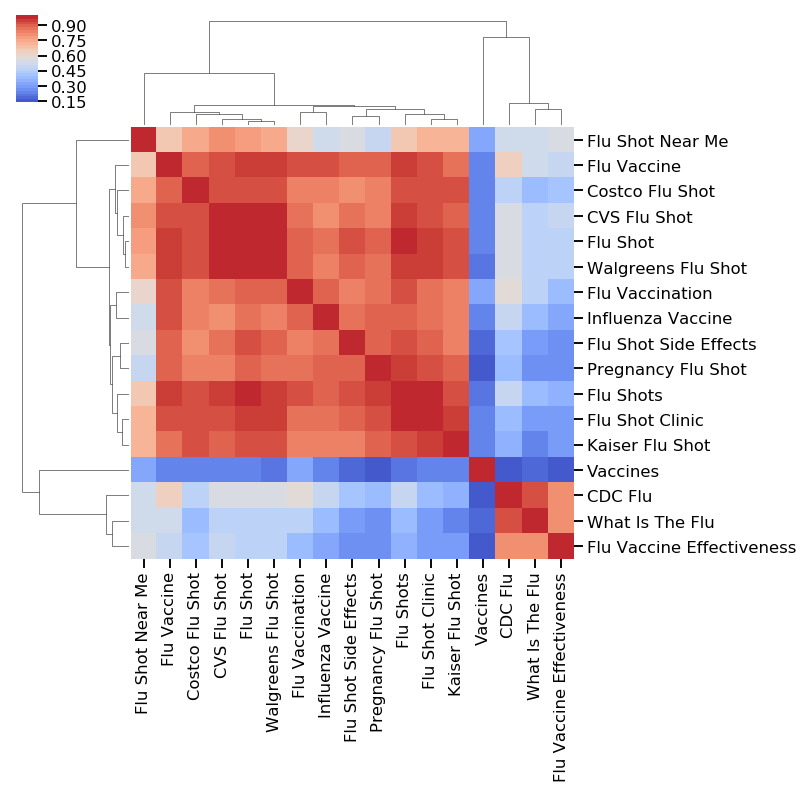

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
sns.clustermap(flu_df.corr(), cmap=sns.color_palette("coolwarm", 30))


We can also make some time-series plots of various states to explore relative to ground truth:

In [6]:
import seaborn as sns

from pytrends.request import TrendReq
import pandas as pd

def getLocData(search_term, locations_dict):
    pytrends = TrendReq(hl='en-US', tz=360)
    df = pd.DataFrame()
    for key, value in locations_dict.items():
        kw_list = [search_term]
        pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo=value, gprop='')
        temp_df = pytrends.interest_over_time()
        df[key] = temp_df[search_term]
        
    return df

def plotRoundedTrends(search_term, locations_dict):
    flu_df = getLocData(search_term, locations_dict)
    flu_df_melted = flu_df.reset_index().melt(id_vars=["date"], var_name="Location")
    flu_df_melted["date_rounded"] = flu_df_melted["date"].map(lambda d: d.replace(day=15))
    sns.set(rc={'figure.figsize':(14,10)})
    sns.set_context("poster")
    sns.lineplot(x="date_rounded", y="value", hue="Location", data=flu_df_melted, ci=50)#, err_style="bars", ci=68)
    
    

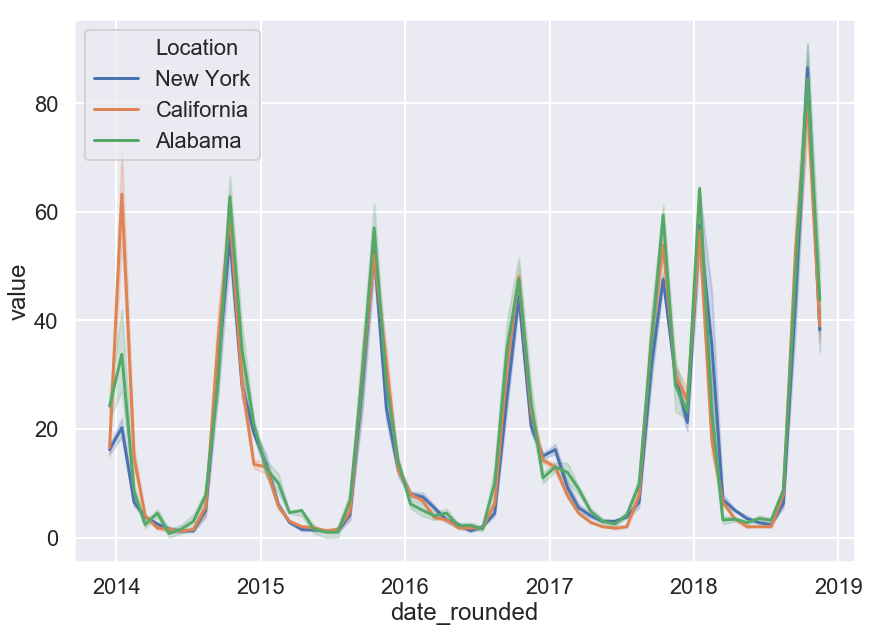

In [7]:
states = {"New York": "US-NY", "California": "US-CA", "Alabama": "US-AL"}

plotRoundedTrends("Flu Shot", states)


We also want to explore the relationship to the ground truth in various geographical region. We need a function that will grab gtrends data for all states, and save to .csv: 

In [8]:
import time

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
state_dict = {state: "US-"+state for state in states}

def all_states_to_csv(search_term, file_path):
    df = getLocData(search_term, state_dict)
    df.to_csv(file_path)
    return df

In [9]:
all_states_to_csv("flu shot", "flu_shot.csv")

,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
date,,,,,,,,,,,,,,,,,,,,,
2013-12-01,22,26,17,4,14,8,12,6,17,14,...,18,12,10,19,19,16,15,7,14,37
2013-12-08,11,0,15,12,18,14,11,7,21,11,...,9,8,13,17,32,13,14,15,13,19
2013-12-15,25,0,12,23,13,11,10,25,18,18,...,0,16,32,15,0,14,14,16,9,21
2013-12-22,26,32,9,17,12,11,9,9,0,10,...,12,22,35,7,15,13,15,9,16,24
2013-12-29,37,30,29,43,26,29,14,28,14,26,...,25,52,54,42,0,24,28,36,36,63
2014-01-05,56,56,42,39,81,46,22,32,13,47,...,28,98,100,54,19,31,77,34,30,19
2014-01-12,50,40,39,76,82,23,26,18,19,44,...,27,84,63,56,24,32,48,24,36,0
2014-01-19,23,40,23,54,48,13,10,18,10,45,...,9,43,33,30,43,23,24,25,36,19
2014-01-26,6,13,24,30,42,14,10,10,10,28,...,17,23,18,16,12,14,10,22,14,18


In [10]:
all_states_to_csv("flu shot", "flu_vaccination.csv")

,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
date,,,,,,,,,,,,,,,,,,,,,
2013-12-01,22,26,17,4,14,8,12,6,17,14,...,18,12,10,19,19,16,15,7,14,37
2013-12-08,11,0,15,12,18,14,11,7,21,11,...,9,8,13,17,32,13,14,15,13,19
2013-12-15,25,0,12,23,13,11,10,25,18,18,...,0,16,32,15,0,14,14,16,9,21
2013-12-22,26,32,9,17,12,11,9,9,0,10,...,12,22,35,7,15,13,15,9,16,24
2013-12-29,37,30,29,43,26,29,14,28,14,26,...,25,52,54,42,0,24,28,36,36,63
2014-01-05,56,56,42,39,81,46,22,32,13,47,...,28,98,100,54,19,31,77,34,30,19
2014-01-12,50,40,39,76,82,23,26,18,19,44,...,27,84,63,56,24,32,48,24,36,0
2014-01-19,23,40,23,54,48,13,10,18,10,45,...,9,43,33,30,43,23,24,25,36,19
2014-01-26,6,13,24,30,42,14,10,10,10,28,...,17,23,18,16,12,14,10,22,14,18
